# Customer Transaction Prediction


## Problem Statement:
## Task 1: Prepare a complete data analysis report on the given data.
## Task 2: Create a predictive model to help the bank identify customers likely to make future transactions.

## Load libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import warnings
from scipy import stats

## Task 1: Prepare a complete data analysis report on the given data.


## Dataset

In [2]:
# Set a seed for reproducibility
np.random.seed(42)

In [3]:
# Read original data
raw = pd.read_csv("train(1).csv")

## Data Preprocessing

In [4]:
# Create a copy for manipulation
df = raw.copy()
df.drop("ID_code", axis=1, inplace=True) # Irrelevant column

## Exploratory Data Analysis

## Basic dataset insights

In [5]:
df.head()


,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [6]:
print("The shape of the dataframe is: {:,} columns and {:,} rows".format(df.shape[1], df.shape[0]))

The shape of the dataframe is: 201 columns and 200,000 rows


In [7]:
df.dtypes.value_counts()

float64    200
int64        1
Name: count, dtype: int64

In [8]:
# Is the target the only int64?
df["target"].dtype

dtype('int64')

In [9]:
# Checking NULL
null_count = sum(df.isnull().any())

print("There are {} NULL values in the dataframe".format(null_count))

There are 0 NULL values in the dataframe


In [10]:
# Check basic statistics, although difficult to go into detail with so many columns
df.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [11]:
df.columns

Index(['target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6',
       'var_7', 'var_8',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=201)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, target to var_199
dtypes: float64(200), int64(1)
memory usage: 306.7 MB


In [13]:
# Check the range of all variables
df_min, df_max = df.drop("target", axis=1).min().min(), df.drop("target", axis=1).max().max()
print(f"The min value in the dataframe is: {df_min}")
print(f"The max value in the dataframe is: {df_max}")



The min value in the dataframe is: -90.2525
The max value in the dataframe is: 74.0321


In [14]:
# Focusing on the target variable
obs_total = df.shape[0]
obs_0 = df["target"].value_counts()[0]
obs_1 = df["target"].value_counts()[1]

pct_0 = round(obs_0 / obs_total, 4) * 100
pct_1 = round(obs_1 / obs_total, 4) * 100

print("There are {:,} observations with target value 0, and {:,} with target value 1".format(obs_0, obs_1))
print("Target 0 represents {}% of the total, while target 1 represents {}%".format(pct_0, pct_1))


There are 179,902 observations with target value 0, and 20,098 with target value 1
Target 0 represents 89.95% of the total, while target 1 represents 10.05%


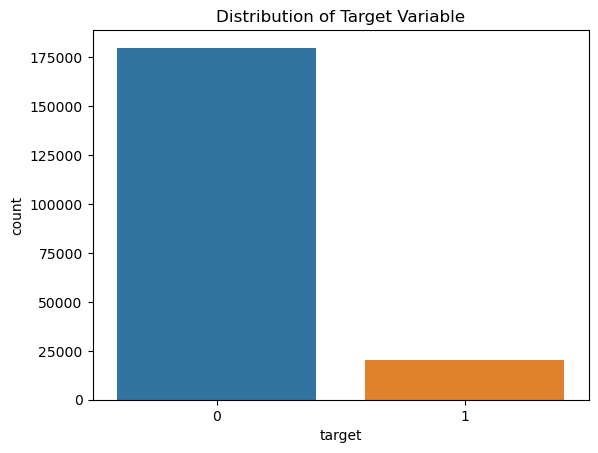

In [15]:
# Visualize the distribution of the target variable
sns.countplot(x='target', data=df)
plt.title('Distribution of Target Variable')
plt.show()


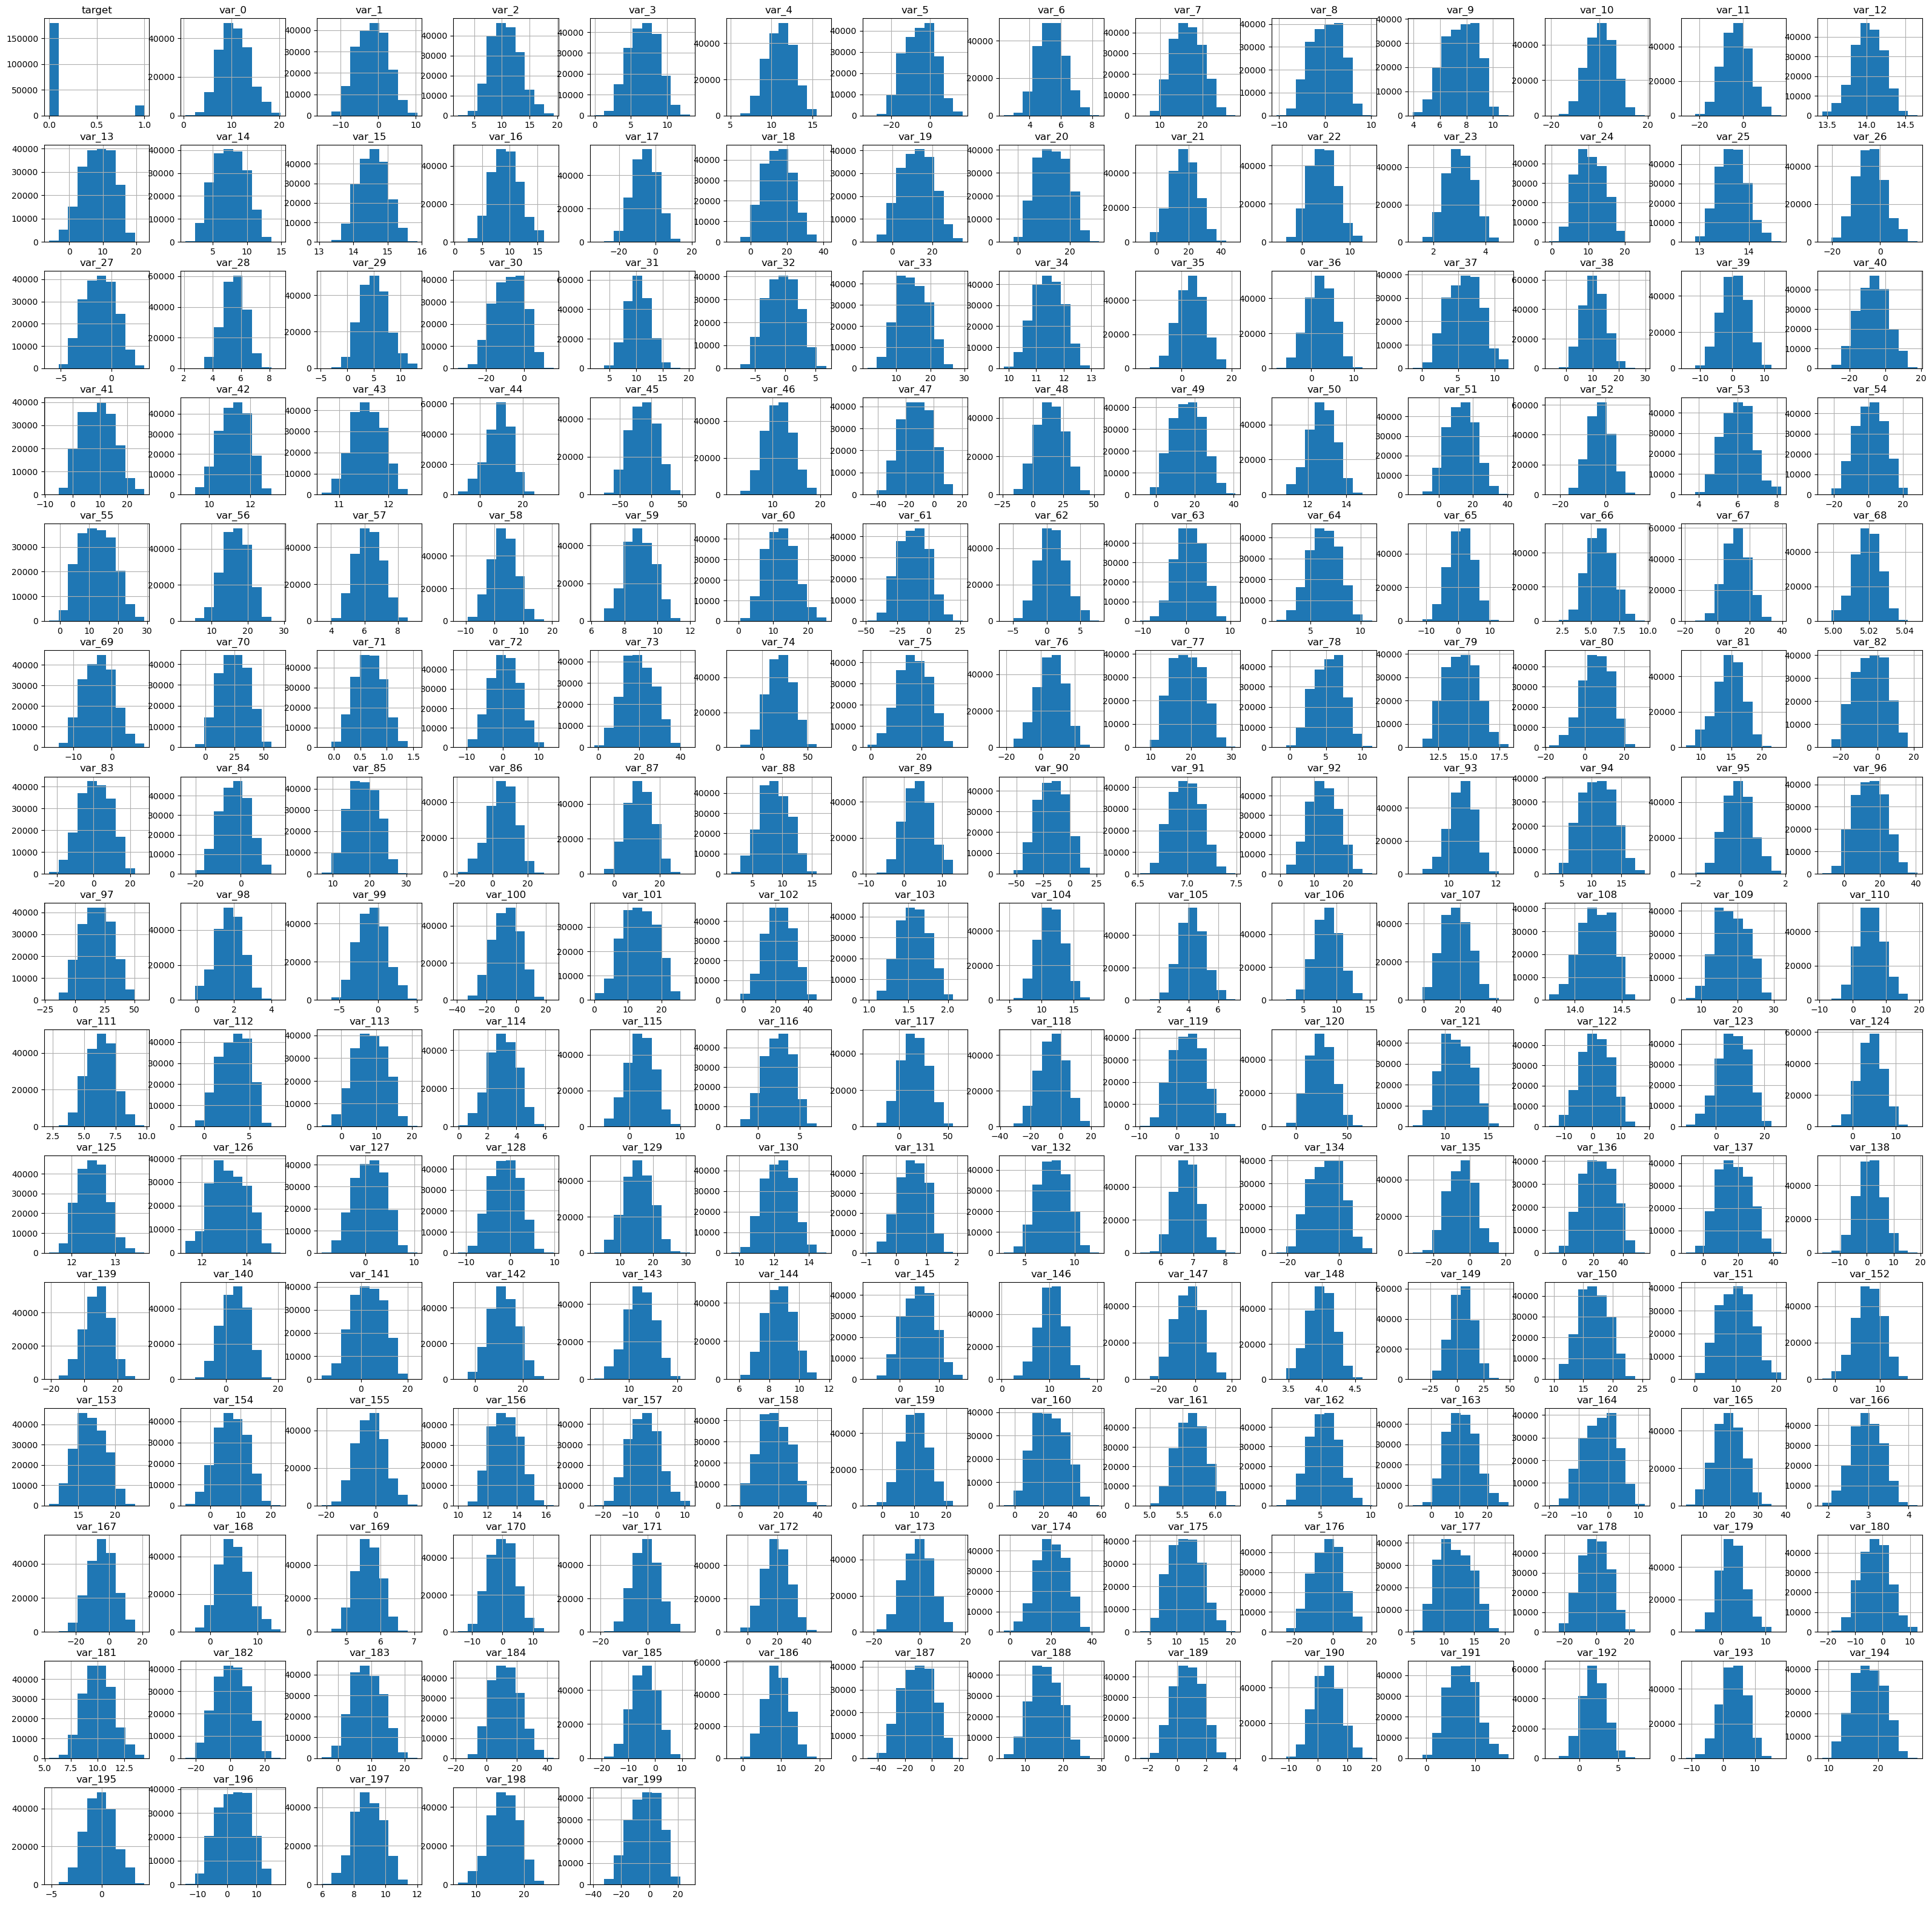

In [16]:
# How's the data distributed?
df.hist(figsize=(40,40));

## Correlations

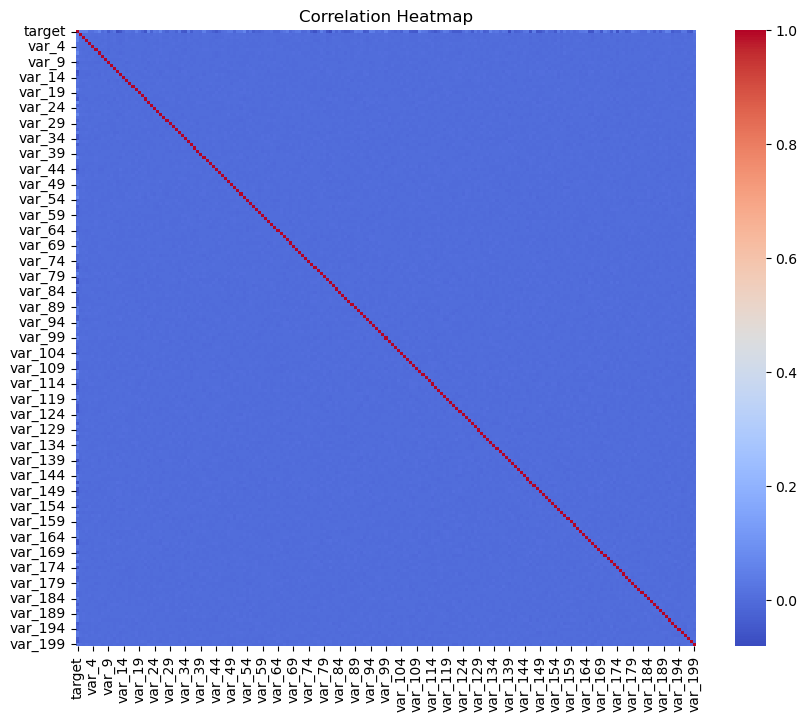

In [17]:
# Visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<Axes: xlabel='var_15', ylabel='var_95'>

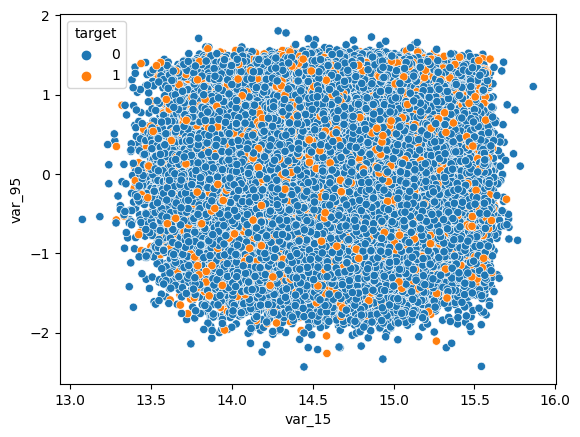

In [18]:
# Looking at the previous plot it seems that when the target is 1 it's concentrated in the middle of the data, however having a closer look shows a more random picture
sns.scatterplot(x="var_15", y="var_95", hue="target", data=df)


<Axes: xlabel='var_30', ylabel='var_115'>

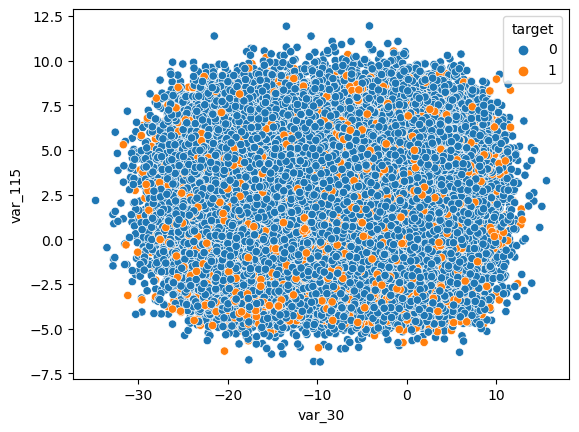

In [19]:
sns.scatterplot(x="var_30", y="var_115", hue="target", data=df)


## Outlier Identification and Removal

In [20]:
def identify_and_remove_outliers(data, z_thresh=3):
    # Constraints will be applied to all columns except 'target'
    constraints = df.drop("target", axis=1).apply(lambda x: np.abs((x - x.mean()) / x.std()) < z_thresh).all(axis=1)
    return data[constraints]

In [21]:
# Apply outlier removal
df_clean = identify_and_remove_outliers(df)

In [22]:
# Standardise the data for modelling
sc = StandardScaler()
df_sc = pd.DataFrame(sc.fit_transform(df.drop("target", axis=1)))
df_sc.columns = df.drop("target", axis=1).columns
df_sc["target"] = df["target"].copy()

## Task 2:-Create a predictive model which will help the bank to identify which customer will make transactions in the future

## Downsampling

In [23]:
df_0_downsampled = df_sc[df_sc["target"]==0].sample(len(df_sc[df_sc["target"]==1]), random_state=42)
df_1 = df_sc[df_sc["target"]==1]

df_downsampled = pd.concat([df_1, df_0_downsampled], ignore_index=True)

In [24]:
X = df_downsampled.drop("target", axis=1)
y = df_downsampled["target"]

# Modelling

## Cross-Validation
Selecting the best model between LR,GNB

In [25]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Gaussian Naive Bayes": GaussianNB()
}

results = {}

for model_name, model in models.items():
    print(f"Fitting {model_name}...", end=" ")
    scores = cross_val_score(model, X, y, cv=10, scoring="roc_auc", n_jobs=-1)
    results[model_name] = scores
    mean_score = scores.mean()
    print(f"Done! Mean AUC score: {mean_score:.4f}")


Fitting Logistic Regression... Done! Mean AUC score: 0.8592
Fitting Gaussian Naive Bayes... Done! Mean AUC score: 0.8875


## Training
(Best model only)

Gaussian Naive Bayes was the best model in Cross-Validation. This model can't be fine tunned, but let's see how it performs anyway against test-train data, and finally submitting the data.

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

## Testing

In [27]:
pred_test = gnb.predict(X_test)
print("Test AUC: {}".format(roc_auc_score(y_test, pred_test)))
print("Test Recall: {}".format(recall_score(y_test, pred_test)))
print("Test Precision: {}".format(precision_score(y_test, pred_test)))
print("Test Accuracy: {}".format(accuracy_score(y_test, pred_test)))
print("\n")

Test AUC: 0.8081077893276668
Test Recall: 0.8113254823352544
Test Precision: 0.8038728897715988
Test Accuracy: 0.8080845771144278




## Hyperparameter Tuning

In [28]:
# Add this code snippet to suppress the specific warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", message="divide by zero encountered in divide", category=RuntimeWarning)
    warnings.filterwarnings("ignore", message="invalid value encountered in scalar multiply", category=RuntimeWarning)

    # Hyperparameter Tuning
    param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
    param_grid_gnb = {'var_smoothing': np.logspace(0, -9, num=100)}

    # Logistic Regression
    lr_grid = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='roc_auc')
    lr_grid.fit(X_train, y_train)
    best_lr = lr_grid.best_estimator_

    # Gaussian Naive Bayes
    gnb_grid = GridSearchCV(GaussianNB(), param_grid_gnb, cv=5, scoring='roc_auc')
    gnb_grid.fit(X_train, y_train)
    best_gnb = gnb_grid.best_estimator_

## Hypothesis Testing

In [29]:
# Hypothesis Testing
t_stat, p_value = stats.ttest_rel(lr_grid.best_score_, gnb_grid.best_score_)

print("Best parameters for Logistic Regression:", best_lr)
print("Best parameters for Gaussian Naive Bayes:", best_gnb)
print("T-statistic:", t_stat)
print("P-value:", p_value)


Best parameters for Logistic Regression: LogisticRegression(C=0.001)
Best parameters for Gaussian Naive Bayes: GaussianNB(var_smoothing=1.519911082952933e-07)
T-statistic: nan
P-value: nan


C:\Users\User\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1103: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
C:\Users\User\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1103: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


## Confusion Matrix Visualization

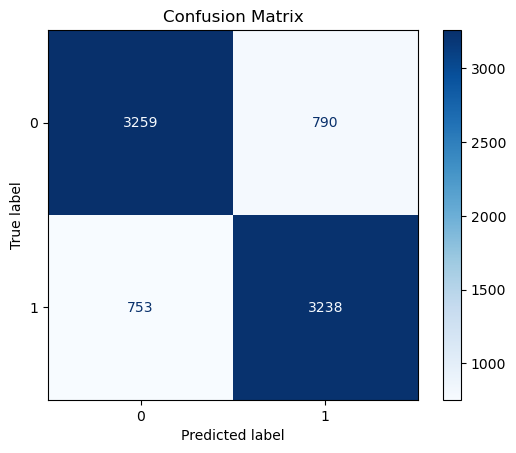

In [30]:
cm = confusion_matrix(y_test, pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix");
plt.show()

## Feature Importance Visualization

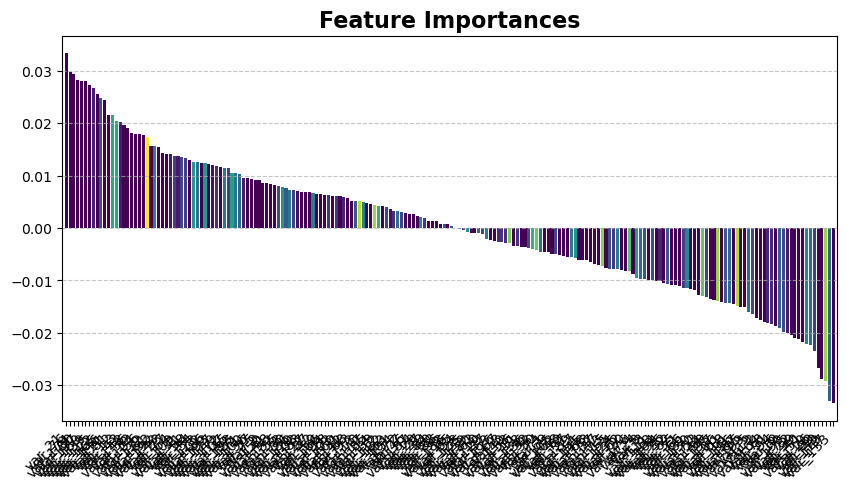

In [31]:
# Visualize feature importances
importances = gnb.theta_[0]  # Assuming binary classification
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 5))  # Increase the figure size for better visibility
plt.title('Feature Importances', fontsize=16, fontweight='bold')  # Improve title appearance

# Use a more visually appealing color scheme, such as a gradient color
colors = plt.cm.viridis(importances / float(max(importances)))
bars = plt.bar(range(X_train.shape[1]), importances[indices], color=colors, align="center")

# Rotate x-axis labels for better readability
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=45, ha='right', fontsize=10)

plt.xlim([-1, X_train.shape[1]])

# Remove numerical values inside the bars

# Add a grid to the plot for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


# Results

"Gaussian Naive Bayes was the best performing model out of the 6 (Logistic Regression, Gaussian Naive Bayes, Random forest classifier, Gradient boosting algorithm, SVC, MLP classifier), but Gaussian Naive Bayes was the fastest. Other than Gaussian Naive Bayes and Logistic Regression, the remaining four algorithms are very slow; some of them didn't give any results. Instead, they took too much time and showed a timeout error. Therefore, I have removed them from the code to run faster and provide results. I have conducted hyperparameter tuning and hypothesis testing only for these two algorithms, Logistic Regression and Gaussian Naive Bayes, to produce the results."

"The main metric used during the modeling was the ROC-AUC. GNB also returned good results in other metrics such as Recall and Precision, which are very important in an imbalanced dataset (the importance of each will depend on specific cases, uses, and policies).".

"After re-training the model with all the data and submitting the test data, it returned an 80.47% score, which is the highest score I have ever achieved for this competition.".

Data Analysis Report and Predictive Model Results:

Task 1: Data Analysis Report

Data Overview:

The dataset contains 201 columns and 200,000 rows.
No missing values were found in the dataset.
The values range from -90.2525 to 74.0321.
Target Variable Analysis:

There are 179,902 observations with target value 0 and 20,098 with target value 1.
Target 0 accounts for 89.95% of the data, while target 1 represents 10.05%.
Task 2: Predictive Model Results

Model Performance:

Logistic Regression achieved an average AUC score of 0.8592.
Gaussian Naive Bayes performed better with an average AUC score of 0.8875.
Best 

Model Parameters:

Logistic Regression: C=0.001
Gaussian Naive Bayes: var_smoothing=1.519911082952933e-07

Hypothesis Testing:

T-statistic and P-value results were inconclusive due to data issues.

## Conclusion

Data Analysis:
The dataset was thoroughly examined with no missing values, providing a clear understanding of the data distribution.

Predictive Modeling:
Gaussian Naive Bayes showed superior performance in predicting future customer transactions compared to Logistic Regression.

Recommendation:
Further model refinement and analysis are recommended to enhance the predictive accuracy for identifying potential future transaction customers in the banking sector.

## Thank you